In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import scipy.stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
def check_data(df):
    print(80 * "*")
    print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
    print(80 * "*")
    print("COLUMNS:\n")
    print(df.columns.values)
    print(df.head())
    print(80 * "*")
    print("DATA INFO:\n")
    print(df.dtypes)
    print(80 * "*")
    print("MISSING VALUES:\n")
    print(df.isnull().sum())
    print(80 * "*")
    print("NUMBER OF UNIQUE VALUES:\n")
    print(df.nunique())
    
check_data(df)

********************************************************************************
DIMENSION: (200, 4)
********************************************************************************
COLUMNS:

['TV' 'Radio' 'Newspaper' 'Sales']
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
********************************************************************************
DATA INFO:

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
********************************************************************************
MISSING VALUES:

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
********************************************************************************
NUMBER OF UNIQUE VALUES:

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64


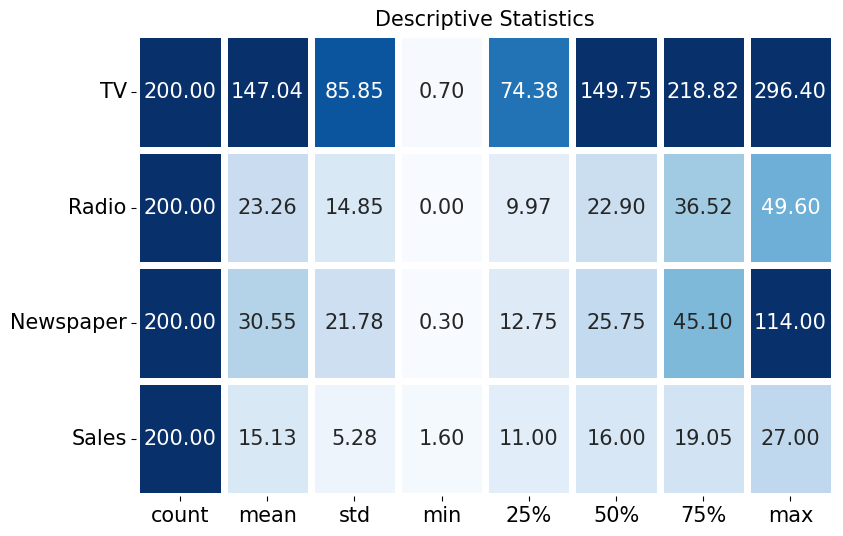

In [16]:
plt.style.use('default')

def summarize_data(df):
    desc = df.describe().T
    desc_df = pd.DataFrame(index= [col for col in df.columns if df[col].dtype != 'O'], 
                       columns= df.describe().T.columns.tolist(),data= desc )

    f,ax = plt.subplots(figsize=(9,6))
    sns.heatmap(desc_df, annot=True,cmap = "Blues", fmt= '.2f', 
                vmin= 0, vmax=100,
                ax=ax,linewidths = 5, cbar = False,
                annot_kws={"size": 15})

    plt.xticks(size = 15)
    plt.yticks(size = 15, rotation = 0)
    plt.title("Descriptive Statistics", size = 15)
    plt.show()
    
summarize_data(df)


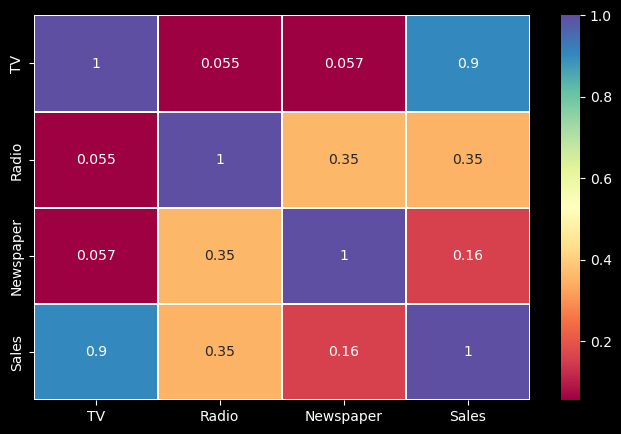

In [17]:
plt.style.use('dark_background')
fig = plt.figure(figsize = (8, 5))
corr = df.corr()
ax = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,
                linewidths = .2, cmap = "Spectral", annot = True)

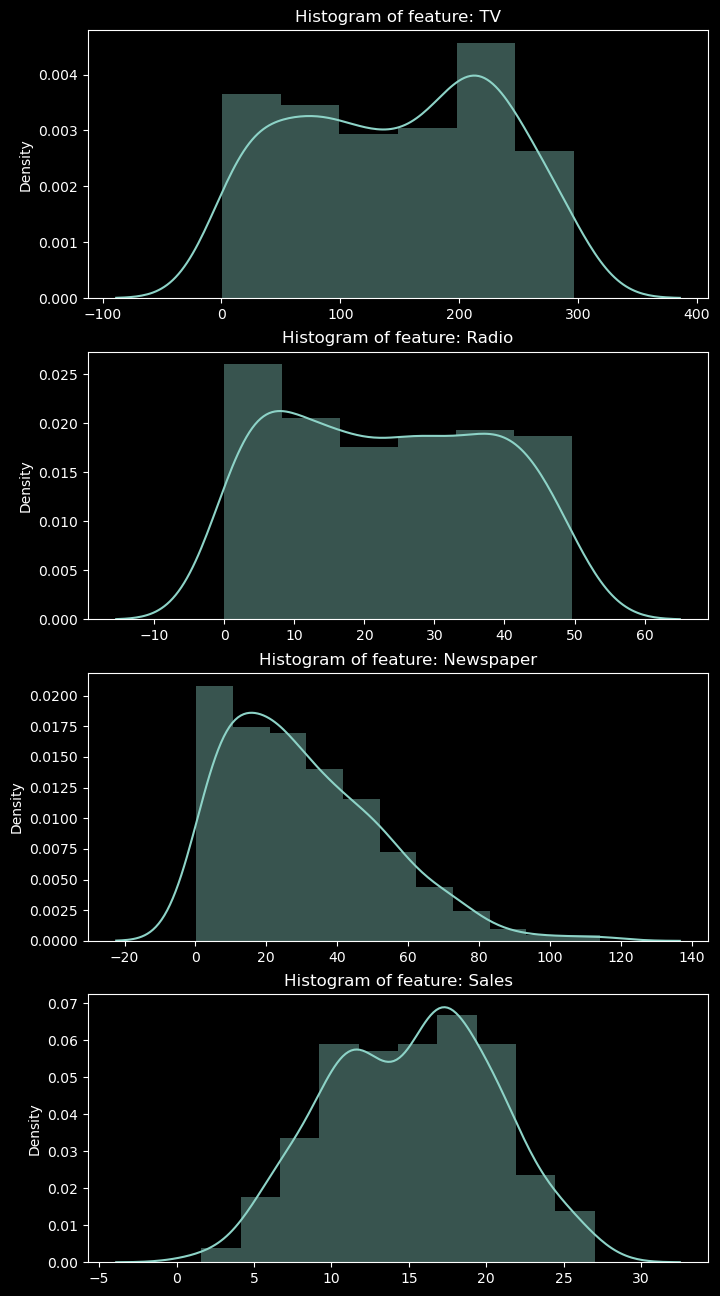

In [18]:
plt.figure(figsize=(8, 4*4))
gs = gridspec.GridSpec(4, 1)
for i, cn in enumerate(df):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn])
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(cn))

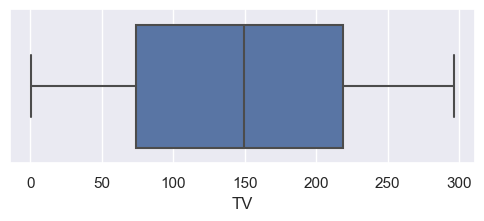

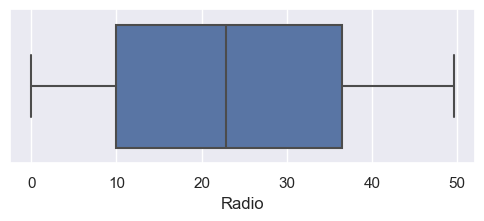

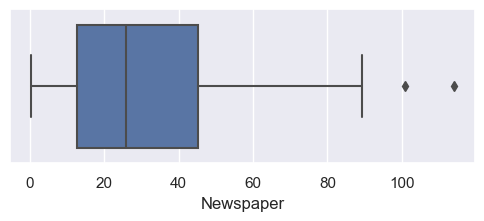

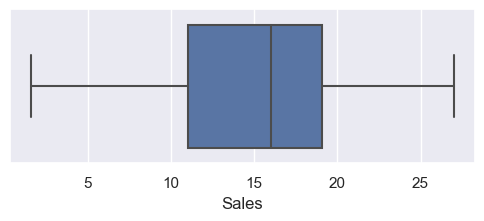

In [19]:
plt.style.use('default')
sns.set(style = 'darkgrid')

for i in df:
    plt.figure(figsize = (6,2))
    sns.boxplot(x = df[i])
    plt.show()

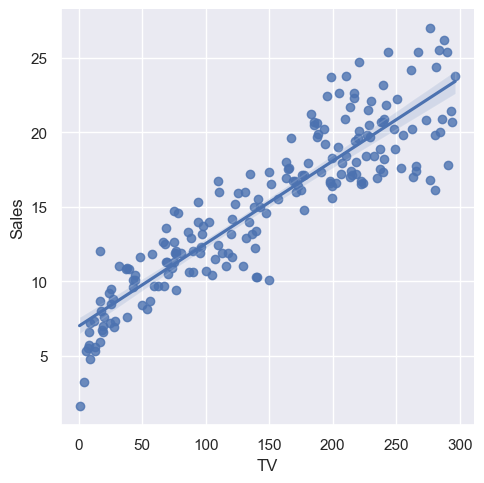

In [20]:
sns.lmplot(x = "TV", y = "Sales", data = df)

In [21]:
X = df["TV"]
y = df["Sales"]

X_sm = sm.add_constant(X)
lr = sm.OLS(y, X_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           7.93e-74
Time:                        08:58:16   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y_pred = lr.predict(X_sm)
residuals = (y - y_pred)

In [23]:
y_pred

0      19.737265
1       9.443004
2       7.928816
3      15.377734
4      17.002852
         ...    
195     9.093576
196    12.199603
197    16.792086
198    22.704630
199    19.848195
Length: 200, dtype: float64

In [24]:
residuals

0      2.362735
1      0.956996
2      4.071184
3      1.122266
4      0.897148
         ...   
195   -1.493576
196    1.800397
197   -1.992086
198    2.795370
199   -1.448195
Length: 200, dtype: float64

In [25]:
print("%.2f" % sum(residuals))

-0.00


In [26]:
scipy.stats.t.ppf(q=1-0.05/2,df=len(y) - 2)

1.9720174778338955

In [27]:
df_ols = smf.ols("Sales ~ TV", data=df)
lm_fit = df_ols.fit()
table = sm.stats.anova_lm(lm_fit, typ=2)
table

,sum_sq,df,F,PR(>F)
TV,4512.43517,1.0,856.176713,7.927912e-74
Residual,1043.54878,198.0,NaN,NaN


In [28]:
print("f : %.2f" % scipy.stats.f.ppf(q=1-0.05, dfn=1, dfd=len(y) - 2))

f : 3.89


In [29]:
print("Confidence intervals for beta0 and beta1: ")
lm_fit.conf_int(0.05)

Confidence intervals for beta0 and beta1: 


,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [30]:
X = df[["TV"]]
y = df["Sales"]
lr = LinearRegression()
lr_model = lr.fit(X, y)
lr_model.predict([[20]])

array([8.0841169])

In [31]:
print("R^2:", lm_fit.rsquared)

R^2: 0.8121757029987414


<AxesSubplot:ylabel='Density'>

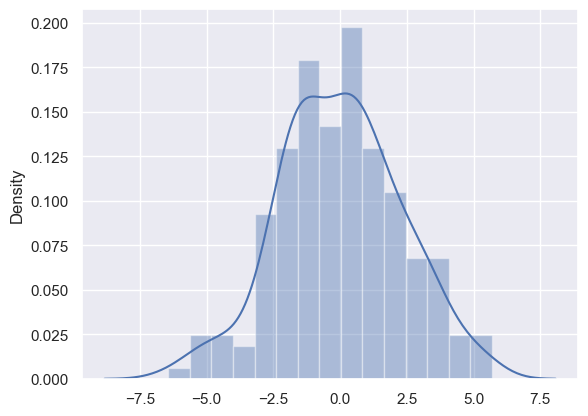

In [34]:
sns.distplot(residuals, bins = 15)

# Save Mode

In [36]:
import pickle
pickle.dump(lr, open("model.pkl", "wb"))

In [39]:
pickled_model = pickle.load(open("model.pkl", "rb"))
pickled_model.score(X, y_pred)

1.0